# Amount of Crime

## By: Daniel Gornick

When rating the overall safety of a neighborhood, most will tell you that one of (if not) the most important things to consider is the amount of crime that occurs in the area. Following this general consensus, I decided to rank the neighborhoods of Pittsburgh from the least to the highest amount of crime. In order to rank them, I will find the total number of incidents per neighborhood, and divide that by the number of people in that neighborhood. I will then multiply that number by 100, which will give me the total number of incidents per 100 people. To achieve this, I will be using 2 datasets: the Pittsburgh Police Incident Blotter (Archive), and the Total Population of Pittsburgh Neighborhoods.

In [4]:
# import the tools
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

# Opens the Incident Blottter .csv file
crimeData = pd.read_csv("PoliceIncidentData.csv")

Since I'm looking for the current safest neighborhood, I'm only going to include incidents that occurred during and after the year 2021. Additionally, the incident blotter includes many columns of information, so I will simpifly the data by removing the columns I don't need.

In [5]:
# This query mask gives me only the entries from the dataset that occurred during and after the year 2021. 
# This works because the INCIDENTTIME starts with the year in every entry.
queryMask = (crimeData['INCIDENTTIME'].str.startswith('2021') | crimeData['INCIDENTTIME'].str.startswith('2022') | 
             crimeData['INCIDENTTIME'].str.startswith('2023'))

# Applies the query mask to the dataset
crimeDataRecent = crimeData[queryMask]

# Removes unnecessary columns of information
crimeDataRecent = crimeDataRecent.drop(['_id', 'PK', 'CCR', 'HIERARCHY', 'INCIDENTLOCATION', 'CLEAREDFLAG', 'INCIDENTZONE', 'INCIDENTHIERARCHYDESC',
                                        'OFFENSES', 'INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'], axis=1)
# Displays first 3 entries
crimeDataRecent.head(3)

,INCIDENTTIME,INCIDENTNEIGHBORHOOD
34298,2021-01-11T04:54:00,Strip District
34299,2021-01-09T22:29:00,Northview Heights
34346,2021-01-01T00:07:00,Sheraden


In [6]:
# Displays last 3 entries
crimeDataRecent.tail(3)

,INCIDENTTIME,INCIDENTNEIGHBORHOOD
137591,2023-09-19T13:00:00,South Side Flats
137592,2023-09-18T17:40:00,Friendship
137593,2023-08-17T23:59:00,North Shore


Now that I've narrowed down the entries to the years including 2021 to the present, I need to get a count for how many entries there were for each neighborhood. Fortunately, the pandas method value_counts() does exactly that.

In [7]:
# Finds how many entries there were in each neighborhood looking at the column INCIDENTNEIGHBORHOOD
crimeNeighborhoods = crimeDataRecent['INCIDENTNEIGHBORHOOD'].value_counts()

# Since the .value_count() method returns a series, I need to make it a dataframe
crimeNeighborhoods = crimeNeighborhoods.to_frame()

# This renames the count of entries column to Incidents
crimeNeighborhoods = crimeNeighborhoods.rename(columns={'INCIDENTNEIGHBORHOOD': 'Incidents'})

# Displays first 5 entries
crimeNeighborhoods.head(5)

,Incidents
Central Business District,7686
South Side Flats,5020
Carrick,3632
East Liberty,2852
Brookline,2642


Knowing how many incidents have occurred in each neighborhood, I can get to work using the information from the Total Population of Pittsburgh Neighborhoods dataset to find the number of crimes per 100 people for each neighborhood. To prevent the results from being heavily skewed, neighborhoods with a population of less than or equal to 500 are excluded.

In [8]:
# Opens the Total Population csv file
population = pd.read_csv("total-population.csv")

# Creates a dictionary that will be used to store the crimes per 100 people for each neighborhood
crimeP100 = dict()

# For each neighborhood in the crimeNeighborhoods dataframe, this temporarily saves the number of crimes 
# in that neighborhood and the neighborhood name as a variable
for index, row in crimeNeighborhoods.iterrows():
    currNeighborhood = index
    incidents = row['Incidents']
    
    # This finds the same neighborhood name in population, and checks to see if its total population is above 500. 
    # It then adds the neighborhood name as a key to the dictionary along with its crimes per 100 people that is calculated.
    # The process is repeated with the rest of the neighborhoods in crimeNeighborhoods.
    for index, row in population.iterrows():
        if currNeighborhood == row["Neighborhood"] and int(row['Estimate; Total']) > 500:
                crimeP100[currNeighborhood] = (int((incidents / int(row['Estimate; Total']))*100))
                break
                
# This turns the dictionary into a dataframe
crimeP100 = pd.DataFrame.from_dict(crimeP100, orient='index')

# This renames the column of crimes per 100 people 
crimeP100 = crimeP100.rename(columns={0: 'Crimes Per 100 People'})

# Displays first 10 entries
crimeP100.head(5)

,Crimes Per 100 People
Central Business District,189
South Side Flats,79
Carrick,35
East Liberty,51
Brookline,20


Now that I have a dataframe of all the neighborhoods and their crimes per 100 people, I can try to graph them to see which one would be the safest to live in.

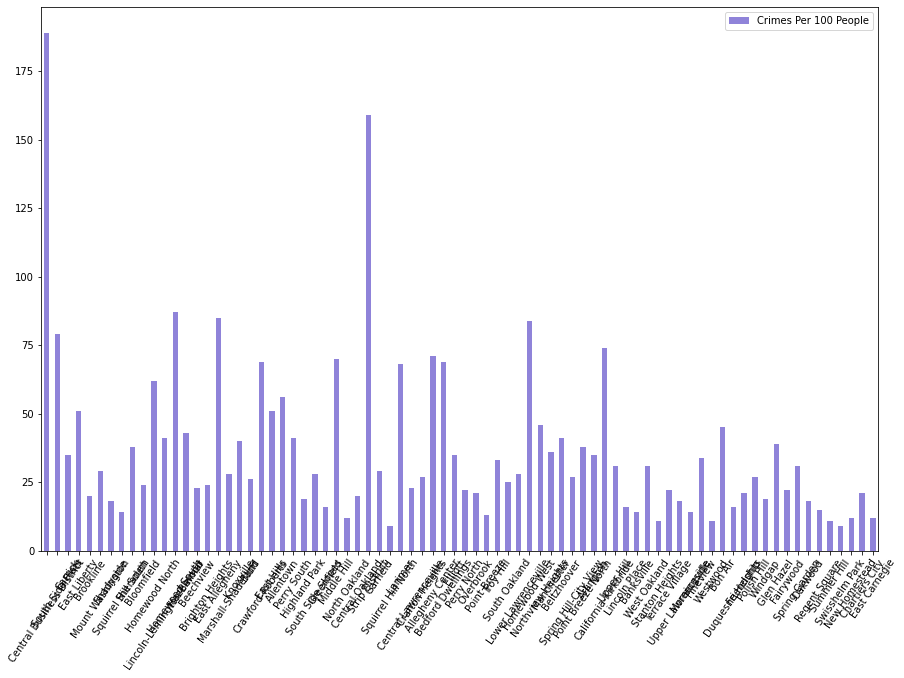

In [9]:
# Creates a bar graph that slightly rotates the x-axis labels, makes it bigger, and changes the color
crimeP100.plot(kind='bar',alpha=0.75, rot=55, figsize = (15, 10), color = 'slateblue')

# Locks the legend to the top right of the graph
plt.legend(bbox_to_anchor=(1,1))

Since it turned out really messy and hard to see which neighborhood is which, I'm going to sort the dataframe from least to greatest crimes per 100 people, and create a bar graph with only the 10 lowest neighborhoods.

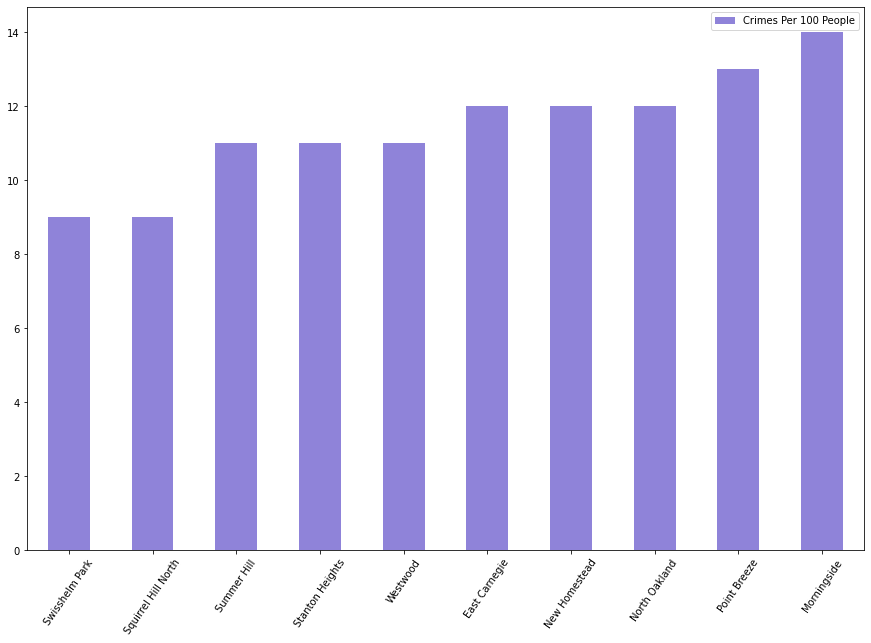

In [10]:
# Sorts the data from least to greatest according to their crimes per 100 people
crimeP100 = crimeP100.sort_values(by=['Crimes Per 100 People'])

# Creates a new dataframe with the top ten entries from crimeP100
lowCrimeP100 = crimeP100.drop(crimeP100.index.to_list()[10:], axis=0)

# Creates a bar graph that slightly rotates the x-axis labels, makes it bigger, and changes the color
lowCrimeP100.plot(kind='bar',alpha=0.75, rot=55, figsize = (15, 10), color = 'slateblue')

# Locks the legend to the top right of the graph
plt.legend(bbox_to_anchor=(1,1))

And with that, the best neighborhoods to live in are Swisshelm Park and Squirrel Hill North (both tied for first place) followed by Summer Hill, Stanton Heights, and Westwood (all tied for second). These 5 neighborhoods have the lowest crimes per 100 people in the city of Pittsburgh making them the safest to live in.

As for how this data-driven determination of the best neighborhood is different from my personal favorite, it's actually very close. Since I'm not from the area of Pittsburgh, I have little knowledge of the different neighborhoods here, but North Oakland has felt safe and looks very pretty making it my favorite neighborhood here. In the graph, North Oakland appeared in the top 10 safest neighborhoods, tied for third place with New Homestead and East Carnegie.